<a href="https://colab.research.google.com/github/jaiwin14/Synapse_LP/blob/week-4/Synapse_Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 4**

## **DJS Synapse Learning Period**
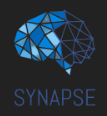

In the task for this week, we will be exploring another ML Models like Decision Tree, Random Forest and Naive Bayes. We will also learn hyperparameter tuning using ensemble techniques (Bagging & Boosting) and Decision Tree Pruning.

**This Task has various theory questions to be answered here and there. Don't miss out on those, as they will make you'll conceptually stronger, and give a better understanding.**

### Overfitting and Underfitting [VERY IMPORTANT]:
https://www.youtube.com/watch?v=T9NtOa-IITo
Note : This concept can be seen in K Means and decision trees. In fact, we will look deeper into
this when we begin deep learning.

# Decision Tree Classifier

* Theory : https://youtu.be/7VeUPuFGJHk
* Theory: https://www.analyticsvidhya.com/blog/2021/08/decision-tree-algorithm/
* Implementation : https://youtu.be/HY2DcBhgwm0

Load the titanic dataset in a pandas dataframe (download dataset from https://www.kaggle.com/c/titanic/data and store it in the "Synapse" folder initially created for the interview tasks) Note that you have to download the train and test csv files seperately

<b>Read the titanic_data.csv using pandas and show the dataframe</b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
df_train = pd.read_csv("/content/train.csv")



In [3]:
df_train


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Visualizing hidden Details

* print the name column of the data
* notice that the word after the first comma encapsulates the title of the person (Mr., Mrs, etc)
* extract the title using regular expression (help given below in the code)
* store the title in a new column in the dataframe. Name the column : Title

In [4]:
df_train[['Name']]

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
...,...
886,"Montvila, Rev. Juozas"
887,"Graham, Miss. Margaret Edith"
888,"Johnston, Miss. Catherine Helen ""Carrie"""
889,"Behr, Mr. Karl Howell"


In [5]:
def extract_name(text):
    match = re.search( ' ([A-Za-z]+)\.', text)
    if match:
        return match.group(1)
    else:
        return None


df_train['Title'] = df_train['Name'].apply(extract_name)


df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


### Removing unnecessary columns
*   The columns PassengerId and Ticket play no logical role in being related to the survival of a passenger. Hence we will remove them.
*   We will also remove the Name column as we have done feature extraction and obtained titles instead. (test set might have extra titles which are not in the train set. Think about how we would consider them. This however doesn't affect task 1's objective)

In [6]:
#write code here
df_train.drop(columns=['PassengerId','Ticket','Name'],inplace=True)

### Nan analysis
*   write code to find the percentage of Nans in each column and visualize it in a tabular format
*   remove any column having more than 50% Nans as they would be of no use

In [7]:
#write code here
columns_to_drop = []

for column in df_train.columns:
    count = df_train[column].isna().sum()
    percent_nan = (count / len(df_train)) * 100
    print(f"{column}: {percent_nan:.2f}% NaN")

    if percent_nan > 50:
        columns_to_drop.append(column)
df_train.drop(columns=columns_to_drop, inplace=True)
df_train

Survived: 0.00% NaN
Pclass: 0.00% NaN
Sex: 0.00% NaN
Age: 19.87% NaN
SibSp: 0.00% NaN
Parch: 0.00% NaN
Fare: 0.00% NaN
Cabin: 77.10% NaN
Embarked: 0.22% NaN
Title: 0.00% NaN


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Rev
887,1,1,female,19.0,0,0,30.0000,S,Miss
888,0,3,female,NaN,1,2,23.4500,S,Miss
889,1,1,male,26.0,0,0,30.0000,C,Mr


*   Fill Nans in the Embark column with the statistical mode
*   Fill Nans in the Age column with it's statistical mean

In [8]:
#write code here
embark_mode = df_train['Embarked'].mode()[0]
df_train['Embarked'].fillna(embark_mode, inplace=True)

age_mean = df_train['Age'].mean()
df_train['Age'].fillna(age_mean, inplace=True)

df_train


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.000000,1,0,7.2500,S,Mr
1,1,1,female,38.000000,1,0,71.2833,C,Mrs
2,1,3,female,26.000000,0,0,7.9250,S,Miss
3,1,1,female,35.000000,1,0,53.1000,S,Mrs
4,0,3,male,35.000000,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Rev
887,1,1,female,19.000000,0,0,30.0000,S,Miss
888,0,3,female,29.699118,1,2,23.4500,S,Miss
889,1,1,male,26.000000,0,0,30.0000,C,Mr


### Adding features to the dataset
*   Read the kaggle link (titanic dataset) provided above and see what the two columns SibSP and Parch signify
*   Using that create a new column called **Family_members**
*   Fill it with the sum of SibSP and Parch

In [9]:
#write code here
df_train['Family_members']=df_train['SibSp']+df_train['Parch']
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_members
0,0,3,male,22.000000,1,0,7.2500,S,Mr,1
1,1,1,female,38.000000,1,0,71.2833,C,Mrs,1
2,1,3,female,26.000000,0,0,7.9250,S,Miss,0
3,1,1,female,35.000000,1,0,53.1000,S,Mrs,1
4,0,3,male,35.000000,0,0,8.0500,S,Mr,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Rev,0
887,1,1,female,19.000000,0,0,30.0000,S,Miss,0
888,0,3,female,29.699118,1,2,23.4500,S,Miss,3
889,1,1,male,26.000000,0,0,30.0000,C,Mr,0


In [10]:
#Normalize the columns ("Age", "Fare", "Family_members")
from sklearn.preprocessing import MinMaxScaler

columns=["Age", "Fare", "Family_members"]
scaler= MinMaxScaler()
df_train[columns] = scaler.fit_transform(df_train[columns])
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_members
0,0,3,male,0.271174,1,0,0.014151,S,Mr,0.1
1,1,1,female,0.472229,1,0,0.139136,C,Mrs,0.1
2,1,3,female,0.321438,0,0,0.015469,S,Miss,0.0
3,1,1,female,0.434531,1,0,0.103644,S,Mrs,0.1
4,0,3,male,0.434531,0,0,0.015713,S,Mr,0.0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0.334004,0,0,0.025374,S,Rev,0.0
887,1,1,female,0.233476,0,0,0.058556,S,Miss,0.0
888,0,3,female,0.367921,1,2,0.045771,S,Miss,0.3
889,1,1,male,0.321438,0,0,0.058556,C,Mr,0.0


In [11]:
#apply one hot encoding on the columns ('Pclass','Sex','Title','Embarked')
columns1=['Pclass','Sex','Title','Embarked']
df = pd.get_dummies(df_train,columns=columns1, dummy_na=False)

In [12]:
df



,Survived,Age,SibSp,Parch,Fare,Family_members,Pclass_1,Pclass_2,Pclass_3,Sex_female,...,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Embarked_C,Embarked_Q,Embarked_S
0,0,0.271174,1,0,0.014151,0.1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0.472229,1,0,0.139136,0.1,1,0,0,1,...,0,0,0,1,0,0,0,1,0,0
2,1,0.321438,0,0,0.015469,0.0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0.434531,1,0,0.103644,0.1,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
4,0,0.434531,0,0,0.015713,0.0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0.334004,0,0,0.025374,0.0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
887,1,0.233476,0,0,0.058556,0.0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
888,0,0.367921,1,2,0.045771,0.3,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
889,1,0.321438,0,0,0.058556,0.0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0


<b>extract the y label (survived) from the dataframe and store it in a new variable</b>

In [13]:
#write code here
y = df_train['Survived']

<b>remove the y_label (survived) from the dataframe</b>

In [14]:
#write code here
df.drop('Survived',axis=1)

,Age,SibSp,Parch,Fare,Family_members,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,...,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Embarked_C,Embarked_Q,Embarked_S
0,0.271174,1,0,0.014151,0.1,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,1
1,0.472229,1,0,0.139136,0.1,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
2,0.321438,0,0,0.015469,0.0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0.434531,1,0,0.103644,0.1,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,0.434531,0,0,0.015713,0.0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.334004,0,0,0.025374,0.0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1
887,0.233476,0,0,0.058556,0.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
888,0.367921,1,2,0.045771,0.3,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
889,0.321438,0,0,0.058556,0.0,1,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0


<b>Split the data into train and test. (do a split in the ratio 70:30)</b>

In [15]:
#write code here
X = df.drop(['Survived'], axis=1)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3, random_state=10)

<b>Now that you have the entire preprocessed and split data, implement the decision tree algorithm from sklearn and fit it to this dataset</b> <br>



In [16]:
#write code here
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_depth=7,random_state=10)
dt_model.fit(X_train,y_train)
y_pred = dt_model.predict(X_test)

<b>Print the Model Accuracy</b>

In [17]:
#write code here
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8208955223880597


## Explain: Give a Real life Example where Decision Tree Classifier can be used.

Ans:

1) Chess Bots

=> Basically whenever tum kisi bot ke saamne khelte ho it predicts all your possible moves and finds a corresponding move to all your moves.


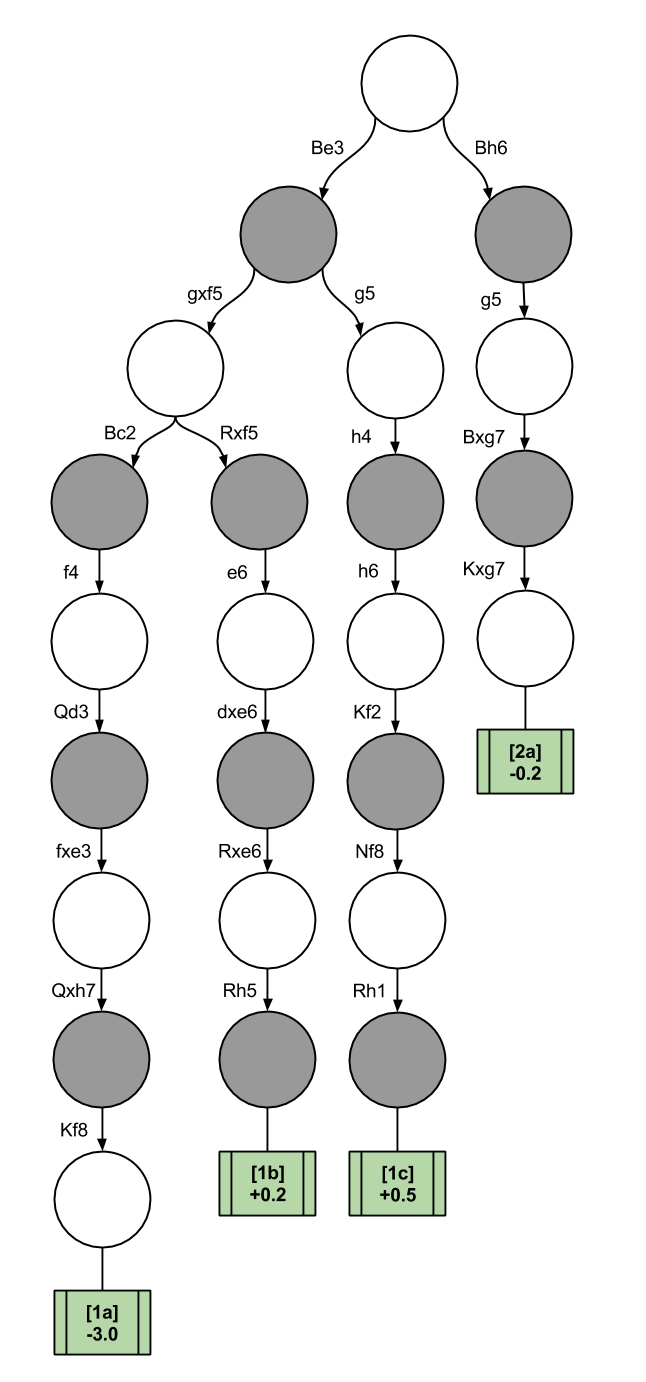

2) Weather Prediction

Now that you have your first result, make sure that you play with the hyperparameters to get a better result. Visualize results, try different hyperparameters by using a loop, GET CREATIVE!<br>

Machine learning is an iteritive process. You will have to keep playing with hyperparameters and algorithms. No fixed algorithm will work on a fixed dataset.

Take this up as a challenge. The person with the best accuracy wins the round!

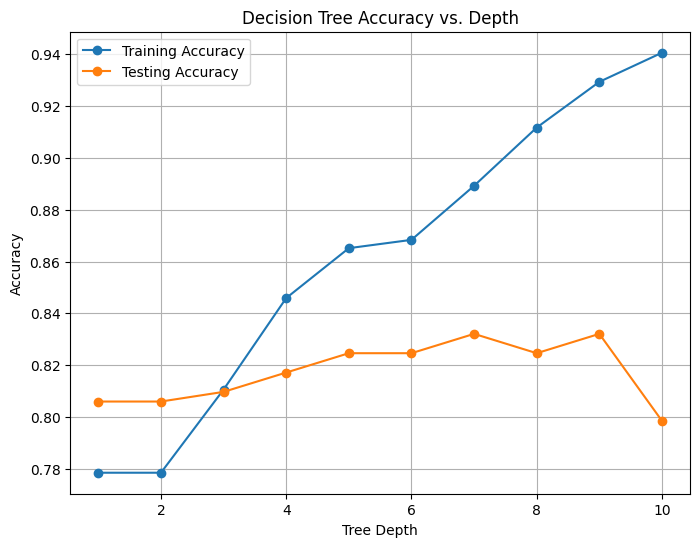

In [18]:
#plot a graph that shows the train and test accuracy for increasing depth of the tree (do for 10)
train_accuracy = []
test_accuracy = []
max_depths = range(1, 11)
for depth in max_depths:
    dt_model = DecisionTreeClassifier(max_depth=depth)
    dt_model.fit(X_train, y_train)

    train_pred = dt_model.predict(X_train)
    train_acc = accuracy_score(y_train, train_pred)
    train_accuracy.append(train_acc)
    test_pred = dt_model.predict(X_test)
    test_acc = accuracy_score(y_test, test_pred)
    test_accuracy.append(test_acc)


plt.figure(figsize=(8, 6))
plt.plot(max_depths, train_accuracy, label='Training Accuracy', marker='o')
plt.plot(max_depths, test_accuracy, label='Testing Accuracy', marker='o')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs. Depth')
plt.legend()
plt.grid(True)
plt.show()

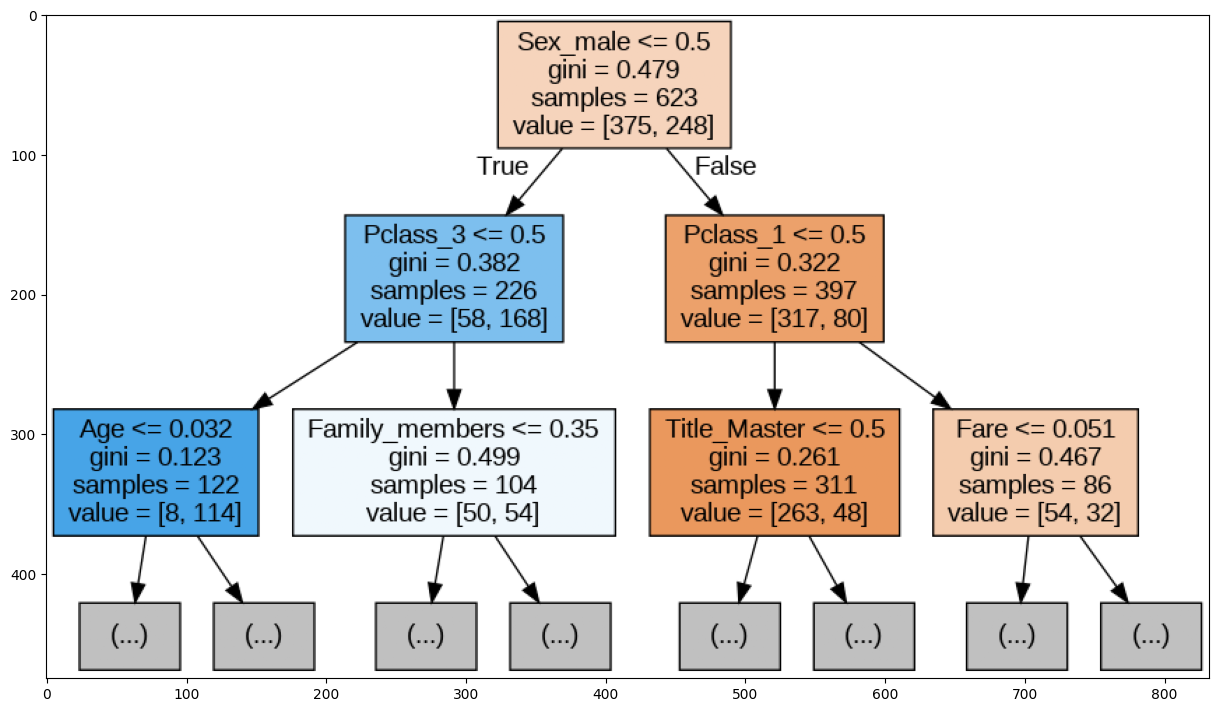

In [19]:
#complete the code below to create an image of the decision tree
from sklearn import tree
!pip install graphviz
decision_tree = tree.export_graphviz(dt_model, out_file='tree.dot', feature_names=X_train.columns, max_depth=2, filled=True)
!dot -Tpng tree.dot -o tree.png # to convert the file
image = plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)

<b>print the test accuracy and train accuracy here</b>

In [20]:
#write code here
train_pred = dt_model.predict(X_train)
train_acc = accuracy_score(y_train, train_pred)
test_pred = dt_model.predict(X_test)
test_acc = accuracy_score(y_test, test_pred)
print(train_acc)
print(test_acc)

0.9406099518459069
0.7985074626865671


## Explain: What is your understanding of the charts you made above?

Ans:

The first scatter plot we made helps us Understand what depth is optimum for us to get the max accuracy score. Accordingly I adjusted my max_depth to get better accuracy.

The second tree helps us to understand how we divide the root node into further nodes and finally leaf nodes. Here the primary condition is uses is to divide on basis of Sex.It also uses gini scores and sample size as parameters.

# Naive Bayes Algorithm

* Theory : https://youtu.be/jS1CKhALUBQ
* Theory:
https://www.analyticsvidhya.com/blog/2021/09/naive-bayes-algorithm-a-complete-guide-for-data-science-enthusiasts/
* Implementation : https://youtu.be/nHIUYwN-5rM

In [21]:
# Write a code to implement naive bayes algorithm, and give the accuracy for the same
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
mnb = MultinomialNB()
mnb.fit(X_train, y_train)


y_pred = mnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8022388059701493


In [22]:
from sklearn.naive_bayes import GaussianNB
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit the Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gnb.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6119402985074627


Because max features are binary except age and fare this does not have much accuracy.

## Explain: What is the difference between Decision Tree Classifier and Naive Bayes algorithm?

Ans:

 **Decision Tree Classifier basically uses Yes or No or True and False to categorize data from root nodes to leaf nodes. Naive Bayes uses probability to figure out if the possible binary output.(Matlab Rainy day pe cricket khelu ya nhi kind of).

Decision Tree mai there are chances of Overfitting. Naive Baiyes simple aur efficient hai.

p(Y=k|X) = p(X|Y=k) x p(Y=k) / p(X) is Naive Bayes Ka formula.
Decision tree uses Gini impurity reduction to branch the data.**

## Optimizing Methods

We can even use Ensemble Methods like **bagging (random forest)**, **boosting (adaboost)** and **Pruning** to improve your accuracy. Again creating a loop of hyperparameters and then finding the best among them is a daunting task. To reduce the efforts, we can use a special technique known as **GridSearchCV**. It finds the best hyperparameters for your model without you having to write multiple loops and evaluating them.

1. GridSearchCV for Random Forest Classifier: https://youtu.be/c4mS7KaOIGY
2. GridSearchCV for Adaboost Classifier: https://youtu.be/JmXnztjULnQ

### 1. Bagging

* Theory : https://www.youtube.com/watch?v=KIOeZ5cFZ50
* Theory :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* Implementation : https://www.youtube.com/watch?v=MxiktOPmhV8&t=2s

In [49]:
#write code here
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()
param_grid = {
    'max_depth': [5,10],

    'max_features': ['auto', 'sqrt', 'log2']

}
rf_Grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, verbose=2, n_jobs=4, scoring ='accuracy')


noob = rf_Grid.fit(X_train, y_train)

best_params = rf_Grid.best_params_
print("Best Parameters:", best_params)

best_score = rf_Grid.score(X_train,y_train)
print("Train accuracy score:", best_score)
best_score_ = rf_Grid.score(X_test,y_test)
print("Test accuracy score:", best_score_)

y_pred = rf_Grid.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Best Random Forest Model Accuracy: {accuracy:.2f}")


Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Parameters: {'max_depth': 5, 'max_features': 'sqrt'}
Train accuracy score: 0.8523274478330658
Test accuracy score: 0.835820895522388
Best Random Forest Model Accuracy: 0.84


## Explain: Under what condition will Random Forest and Decision Trees have the same accuracy?

Ans:

Random Forest is nothing but a bagging technique in which u split the data in several models in this case a Decision Tree.
So if there was only one Decision Tree in RandomForest then it would have same accuracy.

**n_estimators=1**

## Extra - BaggingClassifier

In [24]:
#write a code to implement BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier


## Explain: What is the difference between Random Forest and Bagging Classifier

Ans:

### 2. Boosting

* Theory : https://www.youtube.com/watch?v=NLRO1-jp5F8&t=724s
* Theory :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
* Implementation : https://www.youtube.com/watch?v=7xHM93WXOu8

In [52]:
#write code here
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
ada_classifier = AdaBoostClassifier(random_state=42)

param_grid = {
    'n_estimators': [50,100,150],
    'learning_rate': [0.1, 0.5, 1.0],
}

grid_search = GridSearchCV(estimator=ada_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
cross_val_scores = cross_val_score(grid_search, X_train, y_train, cv=3).max()
print(cross_val_scores)
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Best Random Forest Model Accuracy: {accuracy:.2f}")


0.8317307692307693
Best Random Forest Model Accuracy: 0.81


## Explain: What is the difference between Bagging and Boosting?

Ans:

### 3. Pruning Techniques

https://towardsdatascience.com/build-better-decision-trees-with-pruning-8f467e73b107

In [26]:
#write code here
from sklearn.metrics import make_scorer
from sklearn.model_selection import ParameterGrid


In [27]:
#plot a tree (image) similar to one created for decision tree (graphwiz) for the pruning technique


<b>Note that the accuracy on the test set will be considered and brownie points for *not* overfitting the model in the process</b>

## Explain: After studying these techniques, analyse which method gives you the best accuracy and choose it as your most optimal model.

Ans:


# **Bonus: To be done only if you have completed the above tasks.**

You can research and create a short blog on the topic of **XG Boost Classifier and Regressor**. The best research will be edited and featured on the Synapse Instagram page. Happy coding! :)

# **End of Task**

> ©DJS Synapse 2023 - 2024